In [12]:
import os, warnings
import matplotlib.pyplot as plt
import pathlib
import shutil
import random
from matplotlib import gridspec
from PIL import Image, ImageOps

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [3]:
train_data = train_datagen.flow_from_directory(
    directory = 'D:/SEL Internship/data/train',
    target_size = (512, 512),
    class_mode = 'categorical',
    batch_size = 64,
    seed = 42
)

valid_data = train_datagen.flow_from_directory(
    directory = 'D:/SEL Internship/data/validation',
    target_size = (512, 512),
    class_mode = 'categorical',
    batch_size = 64,
    seed = 42
)

Found 16080 images belonging to 4 classes.
Found 1984 images belonging to 4 classes.


In [4]:
# develops pre-trained model with custom layers

def build_transfer_learning_model(base_model):
    for layer in base_model.layers:
        layer.trainable = False
        
    # Declare a sequential model that combines the base model with custom layers
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=128, activation ='relu'),
        tf.keras.layers.Dense(units=128, activation ='relu'),
        tf.keras.layers.Dense(units=4, activation='tanh')
    ])
    
    # Compile the model
    model.compile(
        optimizer='rmsprop',
        loss='Huber',
        metrics=['accuracy'],
    )
    
    return model

Epoch 1/30
252/252 [==============================] - 3801s 15s/step - loss: 0.0160 - accuracy: 0.9733 - val_loss: 0.0429 - val_accuracy: 0.9819
Epoch 2/30
252/252 [==============================] - 3809s 15s/step - loss: 0.0030 - accuracy: 0.9955 - val_loss: 0.0024 - val_accuracy: 0.9980
Epoch 3/30
252/252 [==============================] - 3739s 15s/step - loss: 0.0014 - accuracy: 0.9976 - val_loss: 3.8118e-04 - val_accuracy: 1.0000
Epoch 4/30
252/252 [==============================] - 3825s 15s/step - loss: 8.0481e-04 - accuracy: 0.9989 - val_loss: 1.5393e-04 - val_accuracy: 1.0000
Epoch 5/30
252/252 [==============================] - 3792s 15s/step - loss: 6.3793e-04 - accuracy: 0.9988 - val_loss: 3.2087e-04 - val_accuracy: 1.0000
Epoch 6/30
252/252 [==============================] - 3760s 15s/step - loss: 4.2236e-04 - accuracy: 0.9992 - val_loss: 2.3805e-04 - val_accuracy: 1.0000
Epoch 7/30
252/252 [==============================] - 4068s 16s/step - loss: 3.6835e-04 - accuracy: 0.

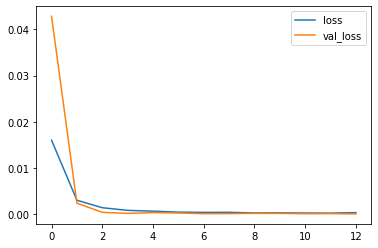

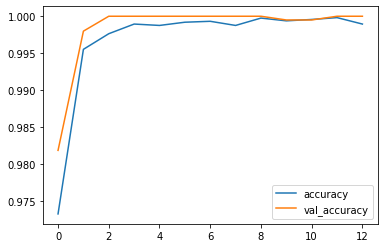

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_new_model = build_transfer_learning_model(
    base_model=VGG16(include_top=False, input_shape=(512, 512, 3), weights='imagenet')
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
    )

# Train the model for 10 epochs
vgg_new_hist = vgg_new_model.fit(
    train_data,
    validation_data=valid_data,
    callbacks=[early_stopping],
    epochs=30,
)

vgg_new_model.summary()

history_frame = pd.DataFrame(vgg_new_hist.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [19]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size=(512, 512))
    return np.array(img) / 255.0

In [25]:
# benign accuracy

num_total, num_correct = 0, 0

for img_path in os.listdir('data/test/benign'):
        img = prepare_single_image('data/test/benign/' + img_path)
        pred = vgg_new_model.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total += 1
        if pred == 0:
            num_correct += 1

print('Number Predicted: ' + str(num_total))
print('Number Correct: ' + str(num_correct))

Number Predicted: 484
Number Correct: 484


In [26]:
# early accuracy

num_total, num_correct = 0, 0

for img_path in os.listdir('data/test/early'):
        img = prepare_single_image('data/test/early/' + img_path)
        pred = vgg_new_model.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total += 1
        if pred == 1:
            num_correct += 1

print('Number Predicted: ' + str(num_total))
print('Number Correct: ' + str(num_correct))

Number Predicted: 484
Number Correct: 484


In [27]:
# pre accuracy

num_total, num_correct = 0, 0

for img_path in os.listdir('data/test/pre'):
        img = prepare_single_image('data/test/pre/' + img_path)
        pred = vgg_new_model.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total += 1
        if pred == 2:
            num_correct += 1

print('Number Predicted: ' + str(num_total))
print('Number Correct: ' + str(num_correct))

Number Predicted: 484
Number Correct: 484


In [28]:
# pro accuracy

num_total, num_correct = 0, 0

for img_path in os.listdir('data/test/pro'):
        img = prepare_single_image('data/test/pro/' + img_path)
        pred = vgg_new_model.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total += 1
        if pred == 3:
            num_correct += 1

print('Number Predicted: ' + str(num_total))
print('Number Correct: ' + str(num_correct))

Number Predicted: 484
Number Correct: 484
